# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''

'\nImport note: The classroom currently uses sklearn version 0.19.\nIf you need to use an imputer, it is available in sklearn.preprocessing.Imputer,\ninstead of sklearn.impute as in newer versions of sklearn.\n'

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep= ';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep=';')

In [3]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).
azdias.shape

(891221, 85)

In [4]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
AGER_TYP                 891221 non-null int64
ALTERSKATEGORIE_GROB     891221 non-null int64
ANREDE_KZ                891221 non-null int64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
FINANZTYP                891221 non-null int64
GEBURTSJAHR              891221 non-null int64
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               891221 non-null int64
LP_LEBENSPHASE_FEIN      886367 non-null float64
LP_LEBENSPHASE_GROB      886367 non-null float64
LP_FAMILIE_FEIN          886367 non-null float64
LP_FAMILIE_GROB          886367 n

In [5]:
azdias.head(10)

AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
0        -1                     2          1            2.0   
1        -1                     1          2            5.0   
2        -1                     3          2            3.0   
3         2                     4          2            2.0   
4        -1                     3          1            5.0   
5         3                     1          2            2.0   
6        -1                     2          2            5.0   
7        -1                     1          1            3.0   
8        -1                     3          1            3.0   
9        -1                     3          2            4.0   

   FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  \
0                  3              4                 3               5   
1                  1              5                 2               5   
2                  1              4                 1               2   
3                  4              2                 5               2   
4                  4              3                 4               1   
5                  3              1                 5               2   
6                  1              5                 1               5   
7                  3              3                 4               1   
8                  4              4                 2               4   
9                  2              4                 2               3   

   FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER    ...     PLZ8_ANTG1  PLZ8_ANTG2  \
0                      5                 3    ...            NaN         NaN   
1                      4                 5    ...            2.0         3.0   
2                      3                 5    ...            3.0         3.0   
3                      1                 2    ...            2.0         2.0   
4                      3                 2    ...            2.0         4.0   
5                      2                 5    ...            2.0         3.0   
6                      4                 3    ...            3.0         3.0   
7                      3                 2    ...            3.0         3.0   
8                      2                 2    ...            2.0         3.0   
9                      5                 4    ...            2.0         3.0   

   PLZ8_ANTG3  PLZ8_ANTG4  PLZ8_BAUMAX  PLZ8_HHZ  PLZ8_GBZ  ARBEIT  \
0         NaN         NaN          NaN       NaN       NaN     NaN   
1         2.0         1.0          1.0       5.0       4.0     3.0   
2         1.0         0.0          1.0       4.0       4.0     3.0   
3         2.0         0.0          1.0       3.0       4.0     2.0   
4         2.0         1.0          2.0       3.0       3.0     4.0   
5         1.0         1.0          1.0       5.0       5.0     2.0   
6         1.0         0.0          1.0       5.0       5.0     4.0   
7         1.0         0.0          1.0       4.0       4.0     2.0   
8         2.0         1.0          1.0       3.0       3.0     2.0   
9         2.0         1.0          1.0       3.0       3.0     2.0   

   ORTSGR_KLS9  RELAT_AB  
0          NaN       NaN  
1          5.0       4.0  
2          5.0       2.0  
3          3.0       3.0  
4          6.0       5.0  
5          3.0       3.0  
6          6.0       3.0  
7          5.0       2.0  
8          4.0       3.0  
9          3.0       1.0  

[10 rows x 85 columns]

In [6]:
azdias.nunique()

AGER_TYP                    5
ALTERSKATEGORIE_GROB        5
ANREDE_KZ                   2
CJT_GESAMTTYP               6
FINANZ_MINIMALIST           5
FINANZ_SPARER               5
FINANZ_VORSORGER            5
FINANZ_ANLEGER              5
FINANZ_UNAUFFAELLIGER       5
FINANZ_HAUSBAUER            5
FINANZTYP                   6
GEBURTSJAHR               117
GFK_URLAUBERTYP            12
GREEN_AVANTGARDE            2
HEALTH_TYP                  4
LP_LEBENSPHASE_FEIN        41
LP_LEBENSPHASE_GROB        13
LP_FAMILIE_FEIN            12
LP_FAMILIE_GROB             6
LP_STATUS_FEIN             10
LP_STATUS_GROB              5
NATIONALITAET_KZ            4
PRAEGENDE_JUGENDJAHRE      16
RETOURTYP_BK_S              5
SEMIO_SOZ                   7
SEMIO_FAM                   7
SEMIO_REL                   7
SEMIO_MAT                   7
SEMIO_VERT                  7
SEMIO_LUST                  7
                         ... 
OST_WEST_KZ                 2
WOHNLAGE                    8
CAMEO_DEUG

In [7]:
azdias.duplicated().any()

True

In [8]:
azdias.duplicated().value_counts()

False    838727
True      52494
dtype: int64

In [9]:
azdias.columns

Index(['AGER_TYP', 'ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'CJT_GESAMTTYP',
       'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER',
       'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER',
       'FINANZTYP', 'GEBURTSJAHR', 'GFK_URLAUBERTYP', 'GREEN_AVANTGARDE',
       'HEALTH_TYP', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB',
       'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN',
       'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'PRAEGENDE_JUGENDJAHRE',
       'RETOURTYP_BK_S', 'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT',
       'SEMIO_VERT', 'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT',
       'SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV',
       'SHOPPER_TYP', 'SOHO_KZ', 'TITEL_KZ', 'VERS_TYP', 'ZABEOTYP',
       'ALTER_HH', 'ANZ_PERSONEN', 'ANZ_TITEL', 'HH_EINKOMMEN_SCORE',
       'KK_KUNDENTYP', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008',
       'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'GEBAEUDETYP', 'KONSUMNAEHE',
       'MIN_

In [10]:
feat_info.shape

(85, 4)

In [11]:
feat_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 4 columns):
attribute             85 non-null object
information_level     85 non-null object
type                  85 non-null object
missing_or_unknown    85 non-null object
dtypes: object(4)
memory usage: 2.7+ KB


In [12]:
feat_info.head(10)

attribute information_level         type missing_or_unknown
0               AGER_TYP            person  categorical             [-1,0]
1   ALTERSKATEGORIE_GROB            person      ordinal           [-1,0,9]
2              ANREDE_KZ            person  categorical             [-1,0]
3          CJT_GESAMTTYP            person  categorical                [0]
4      FINANZ_MINIMALIST            person      ordinal               [-1]
5          FINANZ_SPARER            person      ordinal               [-1]
6       FINANZ_VORSORGER            person      ordinal               [-1]
7         FINANZ_ANLEGER            person      ordinal               [-1]
8  FINANZ_UNAUFFAELLIGER            person      ordinal               [-1]
9       FINANZ_HAUSBAUER            person      ordinal               [-1]

In [13]:
feat_info.type.value_counts()

ordinal        49
categorical    21
numeric         7
mixed           7
interval        1
Name: type, dtype: int64

In [14]:
feat_info.information_level.value_counts()

person            43
macrocell_plz8     8
household          7
building           7
microcell_rr3      6
region_rr1         5
postcode           3
microcell_rr4      3
community          3
Name: information_level, dtype: int64

In [15]:
feat_info.missing_or_unknown.value_counts()

[-1]        26
[-1,9]      17
[-1,0]      16
[0]         12
[]          10
[-1,0,9]     1
[-1,XX]      1
[XX]         1
[-1,X]       1
Name: missing_or_unknown, dtype: int64

In [16]:
azdias.AGER_TYP.value_counts()

-1    677503
 2     98472
 1     79802
 3     27104
 0      8340
Name: AGER_TYP, dtype: int64

In [17]:
missing_AGER_TYP = len(azdias.query('AGER_TYP =="-1"')) + len(azdias.query('AGER_TYP =="0"'))
missing_AGER_TYP
missing_AGER_TYP_percent = (missing_AGER_TYP/891221)*100
missing_AGER_TYP_percent

76.95543529607134

### Dataset Insights:
**I prefer to perform intense investigation on my datasets because that is when you get to know your data and understand what it is about in details in order to be able to perform your analysis and modeling afterwards.**

**We can see that the azdias dataset is the one that contains the general demographic data while the feat_info dataset gives us idea about the features in our dataset , their types and how to encode missing or unknown values. Mentioning missing values it could be seen by investigating the first feature in our general dataset AGER_TYP, it was significantly observed how missing values are more than 75% of the total values of the column and this gives us a significant alarm that missing or unknown values should be handled in our wrangling process next.**

> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [18]:
# First: We identify how the missing or unknown valkues are encoded in our dataset.
feat_info.missing_or_unknown.value_counts()

[-1]        26
[-1,9]      17
[-1,0]      16
[0]         12
[]          10
[-1,0,9]     1
[-1,XX]      1
[XX]         1
[-1,X]       1
Name: missing_or_unknown, dtype: int64

In [19]:
#then we define a function to split our missing values in order to be able to operate on them.
def missing_splited(missing_or_unknown):
    new_list=list()
    for values in missing_or_unknown:
        new_list.append(values[1:-1].split(","))
    return new_list

missing_values=missing_splited(feat_info["missing_or_unknown"])

In [20]:
# then we iterate over these missing values and change the numeric missing values into dtype()-> int 
# and then we locate them and change them into NaNs.
for attribute,missing_values_list in zip(feat_info["attribute"],missing_values):
    if missing_values_list[0] != "":
        for missing_value in missing_values_list:
            if missing_value.isnumeric() or missing_value.lstrip('-').isnumeric():
                missing_value = int(missing_value)
            
            azdias.loc[azdias[attribute] == missing_value, attribute] = np.nan

In [21]:
#checking if missing values were successfully changed to NaNs
azdias.head()

AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
0       NaN                   2.0        1.0            2.0   
1       NaN                   1.0        2.0            5.0   
2       NaN                   3.0        2.0            3.0   
3       2.0                   4.0        2.0            2.0   
4       NaN                   3.0        1.0            5.0   

   FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  \
0                3.0            4.0               3.0             5.0   
1                1.0            5.0               2.0             5.0   
2                1.0            4.0               1.0             2.0   
3                4.0            2.0               5.0             2.0   
4                4.0            3.0               4.0             1.0   

   FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER    ...     PLZ8_ANTG1  PLZ8_ANTG2  \
0                    5.0               3.0    ...            NaN         NaN   
1                    4.0               5.0    ...            2.0         3.0   
2                    3.0               5.0    ...            3.0         3.0   
3                    1.0               2.0    ...            2.0         2.0   
4                    3.0               2.0    ...            2.0         4.0   

   PLZ8_ANTG3  PLZ8_ANTG4  PLZ8_BAUMAX  PLZ8_HHZ  PLZ8_GBZ  ARBEIT  \
0         NaN         NaN          NaN       NaN       NaN     NaN   
1         2.0         1.0          1.0       5.0       4.0     3.0   
2         1.0         0.0          1.0       4.0       4.0     3.0   
3         2.0         0.0          1.0       3.0       4.0     2.0   
4         2.0         1.0          2.0       3.0       3.0     4.0   

   ORTSGR_KLS9  RELAT_AB  
0          NaN       NaN  
1          5.0       4.0  
2          5.0       2.0  
3          3.0       3.0  
4          6.0       5.0  

[5 rows x 85 columns]

#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [22]:
#We try different command to know how to compute the missing values in columns and we reach this one.
azdias.shape[0] - azdias.count()

AGER_TYP                 685843
ALTERSKATEGORIE_GROB       2881
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR              392318
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP               111196
LP_LEBENSPHASE_FEIN       97632
LP_LEBENSPHASE_GROB       94572
LP_FAMILIE_FEIN           77792
LP_FAMILIE_GROB           77792
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ         108315
PRAEGENDE_JUGENDJAHRE    108164
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
                          ...  
OST_WEST

(array([ 39.,  40.,   0.,   1.,   1.,   1.,   1.,   1.,   0.,   1.]),
 array([      0. ,   88906.1,  177812.2,  266718.3,  355624.4,  444530.5,
         533436.6,  622342.7,  711248.8,  800154.9,  889061. ]),
 <a list of 10 Patch objects>)

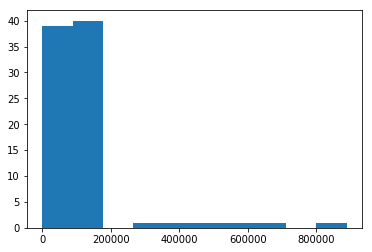

In [23]:
# Identify missing or unknown data values.
missing_vals = (azdias.shape[0] - azdias.count())
plt.hist(missing_vals)

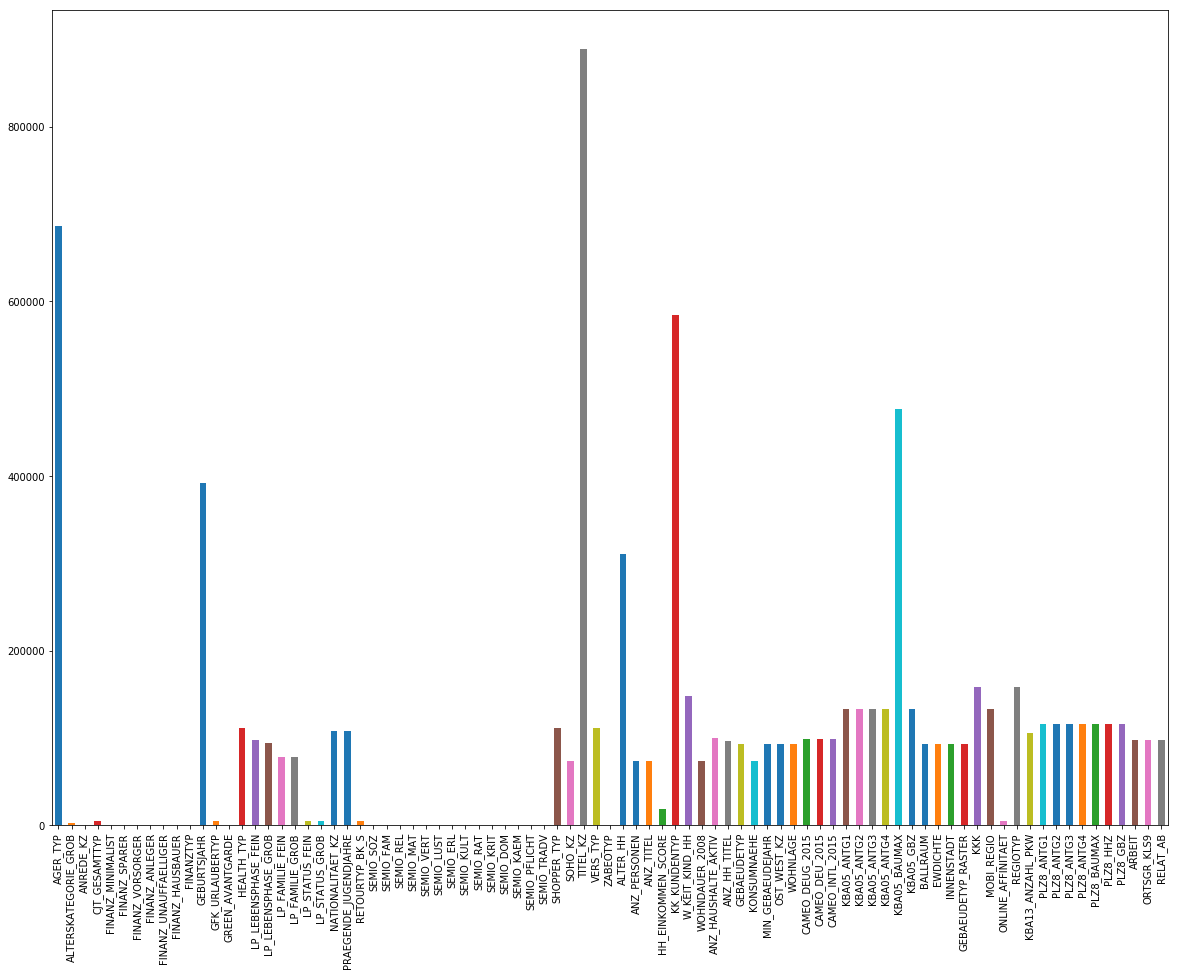

In [24]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.
missing_vals.plot.bar(figsize=(20,15))

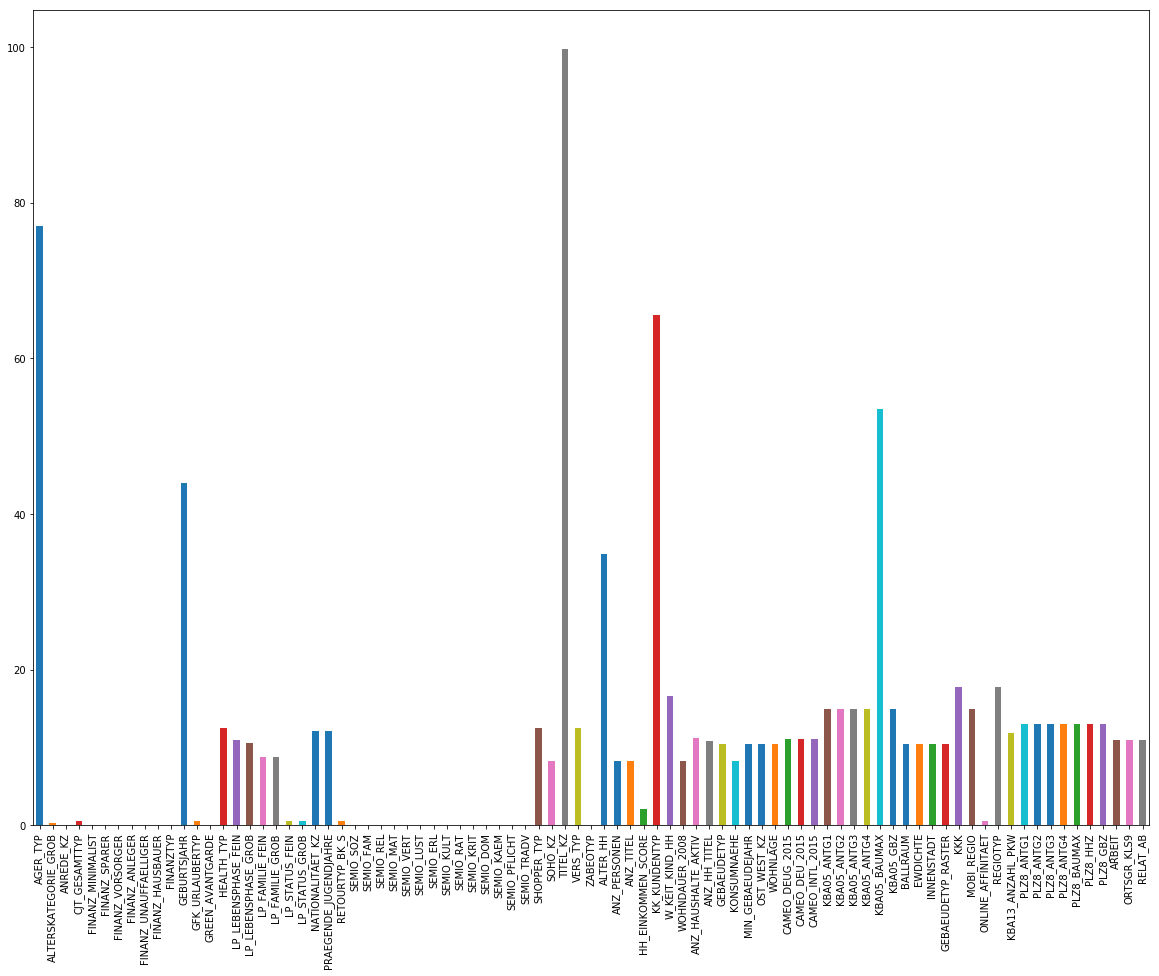

In [25]:
# Investigate patterns in the amount of missing data in each column.
# It is easier to investigate the missing data after changing them into percentage.
missing_vals_percent = (missing_vals/891221)*100
missing_vals_percent.plot.bar(figsize=(20,15))

In [26]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)
# Here we iterate over the columns to identify which outlier columns aren't fit for analysis and thus need to be dropped.
delete_missings = []
for col in azdias.columns:
    if (azdias[col].isnull().sum()/891221) * 100 > 20:
        delete_missings.append(col)

print(delete_missings)

azdias = azdias.drop(columns = (delete_missings),axis=1)
azdias.head() # This is to check that columns were successfully dropped (Ex. AGER_TYP)

['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX']


ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  FINANZ_MINIMALIST  \
0                   2.0        1.0            2.0                3.0   
1                   1.0        2.0            5.0                1.0   
2                   3.0        2.0            3.0                1.0   
3                   4.0        2.0            2.0                4.0   
4                   3.0        1.0            5.0                4.0   

   FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  FINANZ_UNAUFFAELLIGER  \
0            4.0               3.0             5.0                    5.0   
1            5.0               2.0             5.0                    4.0   
2            4.0               1.0             2.0                    3.0   
3            2.0               5.0             2.0                    1.0   
4            3.0               4.0             1.0                    3.0   

   FINANZ_HAUSBAUER  FINANZTYP    ...     PLZ8_ANTG1  PLZ8_ANTG2  PLZ8_ANTG3  \
0               3.0        4.0    ...            NaN         NaN         NaN   
1               5.0        1.0    ...            2.0         3.0         2.0   
2               5.0        1.0    ...            3.0         3.0         1.0   
3               2.0        6.0    ...            2.0         2.0         2.0   
4               2.0        5.0    ...            2.0         4.0         2.0   

   PLZ8_ANTG4  PLZ8_BAUMAX  PLZ8_HHZ  PLZ8_GBZ  ARBEIT  ORTSGR_KLS9  RELAT_AB  
0         NaN          NaN       NaN       NaN     NaN          NaN       NaN  
1         1.0          1.0       5.0       4.0     3.0          5.0       4.0  
2         0.0          1.0       4.0       4.0     3.0          5.0       2.0  
3         0.0          1.0       3.0       4.0     2.0          3.0       3.0  
4         1.0          2.0       3.0       3.0     4.0          6.0       5.0  

[5 rows x 79 columns]

### Discussion 1.1.2: Assess Missing Data in Each Column

**As mentioned from the data insights section, the missing values appear to be a huge problem and that is why we started handling the missing values in columns first through the steps mentioned above through the process in hashes.** 

**This process helped drop the columns that contain missing values more than 20 % and that was assigned by me as the acceptable limit because I thought more than this percentage can really bias our analysis and unsupervised learning processes in the following steps. This resulted in the drop of 6 columns which include for example the AGER_TYP column which was spotted in the investigation process done earlier.**

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [27]:
# How much data is missing in each row of the dataset?
azdias.shape
missing_vals_rows=azdias.isnull().sum(axis=1)
missing_vals_rows
missing_vals_rows_percent = (azdias.isnull().sum(axis=1))/79*100
missing_vals_rows_percent

0         54.430380
1          0.000000
2          0.000000
3          8.860759
4          0.000000
5          0.000000
6          0.000000
7          0.000000
8          0.000000
9          0.000000
10         0.000000
11        59.493671
12         7.594937
13        10.126582
14        59.493671
15        10.126582
16         7.594937
17        59.493671
18         3.797468
19         0.000000
20        12.658228
21         0.000000
22         0.000000
23        10.126582
24        59.493671
25         6.329114
26        24.050633
27         0.000000
28         0.000000
29         2.531646
            ...    
891191     0.000000
891192     0.000000
891193     0.000000
891194     0.000000
891195     0.000000
891196     0.000000
891197     0.000000
891198     0.000000
891199     0.000000
891200     0.000000
891201     0.000000
891202     0.000000
891203    17.721519
891204     0.000000
891205     0.000000
891206     0.000000
891207     0.000000
891208     3.797468
891209     0.000000


(array([  6.97109000e+05,   7.76340000e+04,   1.28010000e+04,
          9.53300000e+03,   8.29000000e+02,   1.55000000e+02,
          1.40160000e+04,   5.03100000e+03,   2.80380000e+04,
          4.60750000e+04]),
 array([  0.        ,   6.20253165,  12.40506329,  18.60759494,
         24.81012658,  31.01265823,  37.21518987,  43.41772152,
         49.62025316,  55.82278481,  62.02531646]),
 <a list of 10 Patch objects>)

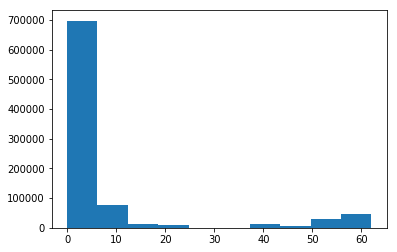

In [28]:
# We here plot a histogram to visualize the distribution of missing values across rows.
plt.hist(missing_vals_rows_percent)

In [29]:
# We divide the rows into 2 lists, 
# one we will keep to perform our coming operations on where missing values are less than 20%
delete_list = azdias[missing_vals_rows_percent>20]
print([missing_vals_rows_percent<20])
keep_list = azdias[missing_vals_rows_percent<20]
print(keep_list.columns)

[0         False
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11        False
12         True
13         True
14        False
15         True
16         True
17        False
18         True
19         True
20         True
21         True
22         True
23         True
24        False
25         True
26        False
27         True
28         True
29         True
          ...  
891191     True
891192     True
891193     True
891194     True
891195     True
891196     True
891197     True
891198     True
891199     True
891200     True
891201     True
891202     True
891203     True
891204     True
891205     True
891206     True
891207     True
891208     True
891209     True
891210     True
891211     True
891212     True
891213     True
891214     True
891215     True
891216     True
891217     True
891218     True
891219     True
891220     True
Length: 891221, dtype: 

In [30]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.
import seaborn as sb

def plot_chart(column):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figwidth(15)
    ax1.set_title('missing values in rows < 20%')
    sns.countplot(azdias.loc[keep_list.index,column],ax=ax1)

    ax2.set_title('missing values in rows > 20%')
    sns.countplot(azdias.loc[delete_list.index,column],ax=ax2)
    
    plt.show()

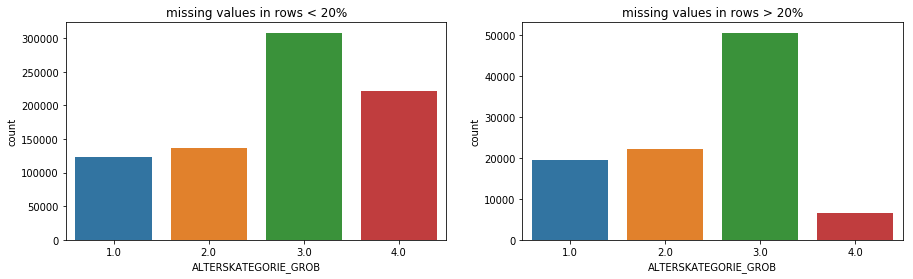

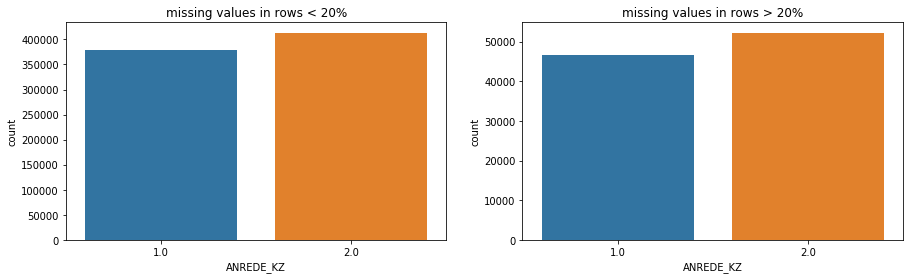

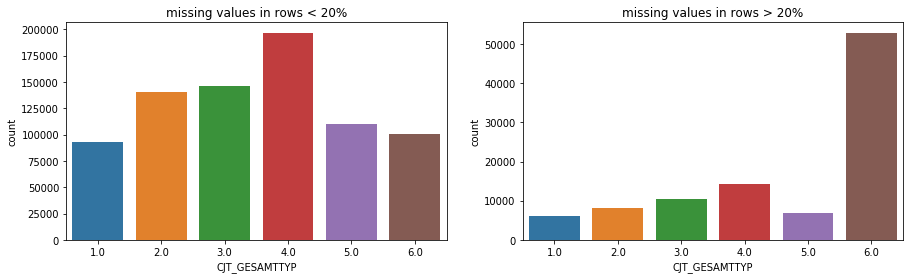

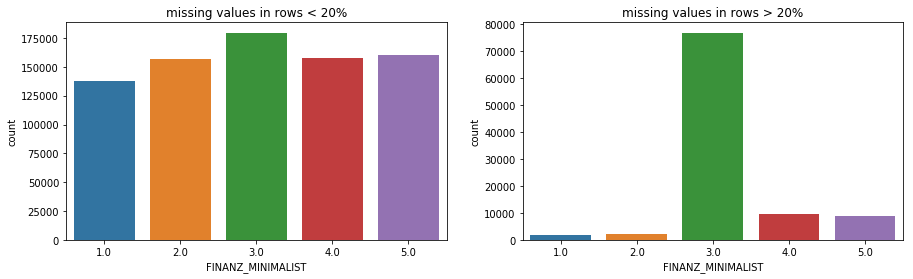

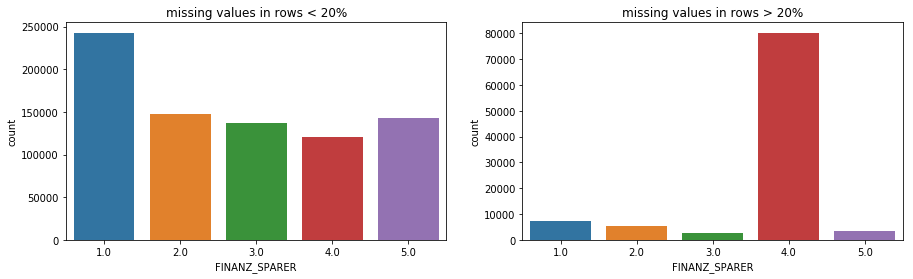

In [31]:
cols = missing_vals_percent[missing_vals_percent<20].index
top_cols = cols[:5]
top_cols
for x in range(top_cols.size):
    plot_chart(top_cols[x])

In [32]:
keep_list.fillna(keep_list.mean().iloc[0], inplace = True)
keep_list.isnull().any()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


ALTERSKATEGORIE_GROB     False
ANREDE_KZ                False
CJT_GESAMTTYP            False
FINANZ_MINIMALIST        False
FINANZ_SPARER            False
FINANZ_VORSORGER         False
FINANZ_ANLEGER           False
FINANZ_UNAUFFAELLIGER    False
FINANZ_HAUSBAUER         False
FINANZTYP                False
GFK_URLAUBERTYP          False
GREEN_AVANTGARDE         False
HEALTH_TYP               False
LP_LEBENSPHASE_FEIN      False
LP_LEBENSPHASE_GROB      False
LP_FAMILIE_FEIN          False
LP_FAMILIE_GROB          False
LP_STATUS_FEIN           False
LP_STATUS_GROB           False
NATIONALITAET_KZ         False
PRAEGENDE_JUGENDJAHRE    False
RETOURTYP_BK_S           False
SEMIO_SOZ                False
SEMIO_FAM                False
SEMIO_REL                False
SEMIO_MAT                False
SEMIO_VERT               False
SEMIO_LUST               False
SEMIO_ERL                False
SEMIO_KULT               False
                         ...  
MIN_GEBAEUDEJAHR         False
OST_WEST

### Discussion 1.1.3: Assess Missing Data in Each Row

**As we can see, we observed the distribution of missing values across rows and then we divided our datasets into 2 lists to keep one and forget the other one. The list we kept to complete our operations on had missing values that are less than 20% of the whole missing values and the comparison between both lists can be observed in the above multiple bar charts plotted using seaborn. Then we filled these missing values with the mean because after we removed the outliers in the previous step I think the mean can be a better value to fill our missing ones because of the fact that it is a value that is impacted by all the values in our dataset.** 

**I just have a question here concerning the last cell that fills the NaNs with the mean value. This cell took too much time processing. Why is that ? and if there is any way to improve this kindly mention it in the feedback.**

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [33]:
# How many features are there of each data type?
feat_info=feat_info[feat_info.attribute.isin(keep_list.columns)]
print(feat_info.type.value_counts())
print('\nThere are 18 categorical and 6 mixed types that need to be handled')

ordinal        49
categorical    18
numeric         6
mixed           6
Name: type, dtype: int64

There are 18 categorical and 6 mixed types that need to be handled


#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [34]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?
# We used here the feat_info dataset.
categoricals = feat_info.query('type =="categorical"')
print(categoricals)
num_binary_categoricals = categoricals.query('missing_or_unknown == "[-1,0]" or missing_or_unknown == "[-1,9]"')
print(num_binary_categoricals)
non_num_binaries = categoricals.query('missing_or_unknown =="[-1,X]"')
print(non_num_binaries)

           attribute information_level         type missing_or_unknown
2          ANREDE_KZ            person  categorical             [-1,0]
3      CJT_GESAMTTYP            person  categorical                [0]
10         FINANZTYP            person  categorical               [-1]
12   GFK_URLAUBERTYP            person  categorical                 []
13  GREEN_AVANTGARDE            person  categorical                 []
17   LP_FAMILIE_FEIN            person  categorical                [0]
18   LP_FAMILIE_GROB            person  categorical                [0]
19    LP_STATUS_FEIN            person  categorical                [0]
20    LP_STATUS_GROB            person  categorical                [0]
21  NATIONALITAET_KZ            person  categorical             [-1,0]
38       SHOPPER_TYP            person  categorical               [-1]
39           SOHO_KZ            person  categorical               [-1]
41          VERS_TYP            person  categorical               [-1]
42    

In [35]:
# We used the information gained in the previous cell to iterate over these features in our general dataset
# in order to be able to re-encode thes missing values in these features.
azdias_binaries = []
azdias_multiple = []
for column in categoricals.attribute:
    if keep_list[column].nunique()==2:
        azdias_binaries.append(column)
    else:
        azdias_multiple.append(column)

print(azdias_binaries)
print(azdias_multiple)

for x in azdias_binaries:
    print(keep_list[x].value_counts())

['ANREDE_KZ', 'GREEN_AVANTGARDE', 'SOHO_KZ', 'OST_WEST_KZ']
['CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'VERS_TYP', 'ZABEOTYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']
2.0    413088
1.0    379199
Name: ANREDE_KZ, dtype: int64
0    618002
1    174285
Name: GREEN_AVANTGARDE, dtype: int64
0.0    785624
1.0      6663
Name: SOHO_KZ, dtype: int64
W    624737
O    167550
Name: OST_WEST_KZ, dtype: int64


In [36]:
# Re-encode categorical variable(s) to be kept in the analysis.
keep_list["ANREDE_KZ"].replace({2:0,1:1},inplace=True)
keep_list["SOHO_KZ"].replace({0.0:0,1.0:1},inplace=True)
keep_list["OST_WEST_KZ"].replace({'W':0,'O':1},inplace=True)

print(keep_list.ANREDE_KZ.value_counts())# This is to test that the re-encoding process was done successfully

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


0.0    413088
1.0    379199
Name: ANREDE_KZ, dtype: int64


In [37]:
#for the multiple level categoricals I chose to drop them from the dataframe.
print(azdias_multiple)
keep_list.drop(columns= azdias_multiple, axis=1, inplace = True)

['CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'VERS_TYP', 'ZABEOTYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [38]:
print(keep_list.info()) # This is to test that all our previous operations worked successfully.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792287 entries, 1 to 891220
Data columns (total 65 columns):
ALTERSKATEGORIE_GROB     792287 non-null float64
ANREDE_KZ                792287 non-null float64
FINANZ_MINIMALIST        792287 non-null float64
FINANZ_SPARER            792287 non-null float64
FINANZ_VORSORGER         792287 non-null float64
FINANZ_ANLEGER           792287 non-null float64
FINANZ_UNAUFFAELLIGER    792287 non-null float64
FINANZ_HAUSBAUER         792287 non-null float64
GREEN_AVANTGARDE         792287 non-null int64
HEALTH_TYP               792287 non-null float64
LP_LEBENSPHASE_FEIN      792287 non-null float64
LP_LEBENSPHASE_GROB      792287 non-null float64
PRAEGENDE_JUGENDJAHRE    792287 non-null float64
RETOURTYP_BK_S           792287 non-null float64
SEMIO_SOZ                792287 non-null float64
SEMIO_FAM                792287 non-null float64
SEMIO_REL                792287 non-null float64
SEMIO_MAT                792287 non-null float64
SEMIO_VER

### Discussion 1.2.1: Re-Encode Categorical Features

**We could identify using the feat_info data set the categorical variables and which of them were numeric binaries and which were non_numeric and so on. Then we used the categoricals list formed from this step to iterate over our general data frame in order to re-encode the original missing values encoding with zeros and ones.** 

**As for the multiple categorical features I decided to drops them from the analysis.**

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [39]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
mixed_types = feat_info.query('type == "mixed"')
mixed_types

attribute information_level   type missing_or_unknown
15    LP_LEBENSPHASE_FEIN            person  mixed                [0]
16    LP_LEBENSPHASE_GROB            person  mixed                [0]
22  PRAEGENDE_JUGENDJAHRE            person  mixed             [-1,0]
56               WOHNLAGE          building  mixed               [-1]
59        CAMEO_INTL_2015     microcell_rr4  mixed            [-1,XX]
79            PLZ8_BAUMAX    macrocell_plz8  mixed             [-1,0]

### 1.18. PRAEGENDE_JUGENDJAHRE
Dominating movement of person's youth (avantgarde vs. mainstream; east vs. west)
- -1: unknown
-  0: unknown
-  1: 40s - war years (Mainstream, E+W)
-  2: 40s - reconstruction years (Avantgarde, E+W)
-  3: 50s - economic miracle (Mainstream, E+W)
-  4: 50s - milk bar / Individualisation (Avantgarde, E+W)
-  5: 60s - economic miracle (Mainstream, E+W)
-  6: 60s - generation 68 / student protestors (Avantgarde, W)
-  7: 60s - opponents to the building of the Wall (Avantgarde, E)
-  8: 70s - family orientation (Mainstream, E+W)
-  9: 70s - peace movement (Avantgarde, E+W)
- 10: 80s - Generation Golf (Mainstream, W)
- 11: 80s - ecological awareness (Avantgarde, W)
- 12: 80s - FDJ / communist party youth organisation (Mainstream, E)
- 13: 80s - Swords into ploughshares (Avantgarde, E)
- 14: 90s - digital media kids (Mainstream, E+W)
- 15: 90s - ecological awareness (Avantgarde, E+W)

In [40]:
def Make_Decades(x):
    if x in (1,2):
        return 40
    elif x in (3,4):
        return 50
    elif x in (5,6,7):
        return 60
    elif x in (8,9):
        return 70
    elif x in (10,11,12,13):
        return 80
    elif x in (14,15):
        return 90
    
def Make_Movements(x):
    if x in (2,4,6,7,9,11,13,15):
        return 0
    elif x in (1,3,5,8,10,12,14):
        return 1
    
keep_list['Decades'] = keep_list['PRAEGENDE_JUGENDJAHRE'].apply(Make_Decades)
keep_list['Movements'] = keep_list['PRAEGENDE_JUGENDJAHRE'].apply(Make_Movements)
print(keep_list['Decades'].value_counts())
print(keep_list['Movements'].value_counts())

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


90.0    223603
70.0    174196
80.0    150778
60.0    114029
50.0     74046
40.0     28020
Name: Decades, dtype: int64
1.0    590387
0.0    174285
Name: Movements, dtype: int64


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [41]:
keep_list.drop(columns = ("PRAEGENDE_JUGENDJAHRE"),axis=1,  inplace = True)
keep_list.columns

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'FINANZ_MINIMALIST',
       'FINANZ_SPARER', 'FINANZ_VORSORGER', 'FINANZ_ANLEGER',
       'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER', 'GREEN_AVANTGARDE',
       'HEALTH_TYP', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB',
       'RETOURTYP_BK_S', 'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT',
       'SEMIO_VERT', 'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT',
       'SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV',
       'SOHO_KZ', 'ANZ_PERSONEN', 'ANZ_TITEL', 'HH_EINKOMMEN_SCORE',
       'W_KEIT_KIND_HH', 'WOHNDAUER_2008', 'ANZ_HAUSHALTE_AKTIV',
       'ANZ_HH_TITEL', 'KONSUMNAEHE', 'MIN_GEBAEUDEJAHR', 'OST_WEST_KZ',
       'WOHNLAGE', 'CAMEO_INTL_2015', 'KBA05_ANTG1', 'KBA05_ANTG2',
       'KBA05_ANTG3', 'KBA05_ANTG4', 'KBA05_GBZ', 'BALLRAUM', 'EWDICHTE',
       'INNENSTADT', 'GEBAEUDETYP_RASTER', 'KKK', 'MOBI_REGIO',
       'ONLINE_AFFINITAET', 'REGIOTYP', 'KBA13_ANZAHL_PKW', 'PLZ8_ANTG1',
       'PLZ8_A

### 4.3. CAMEO_INTL_2015
German CAMEO: Wealth / Life Stage Typology, mapped to international code
- -1: unknown
- 11: Wealthy Households - Pre-Family Couples & Singles
- 12: Wealthy Households - Young Couples With Children
- 13: Wealthy Households - Families With School Age Children
- 14: Wealthy Households - Older Families &  Mature Couples
- 15: Wealthy Households - Elders In Retirement
- 21: Prosperous Households - Pre-Family Couples & Singles
- 22: Prosperous Households - Young Couples With Children
- 23: Prosperous Households - Families With School Age Children
- 24: Prosperous Households - Older Families & Mature Couples
- 25: Prosperous Households - Elders In Retirement
- 31: Comfortable Households - Pre-Family Couples & Singles
- 32: Comfortable Households - Young Couples With Children
- 33: Comfortable Households - Families With School Age Children
- 34: Comfortable Households - Older Families & Mature Couples
- 35: Comfortable Households - Elders In Retirement
- 41: Less Affluent Households - Pre-Family Couples & Singles
- 42: Less Affluent Households - Young Couples With Children
- 43: Less Affluent Households - Families With School Age Children
- 44: Less Affluent Households - Older Families & Mature Couples
- 45: Less Affluent Households - Elders In Retirement
- 51: Poorer Households - Pre-Family Couples & Singles
- 52: Poorer Households - Young Couples With Children
- 53: Poorer Households - Families With School Age Children
- 54: Poorer Households - Older Families & Mature Couples
- 55: Poorer Households - Elders In Retirement
- XX: unknown

In [42]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
def Make_Wealth(x):
    if x in (11,12,13,14,15):
        return 1
    elif x in (21,22,23,24,25):
        return 2
    elif x in (31,32,33,34,35):
        return 3
    elif x in (41,42,43,44,45):
        return 4
    elif x in (51,52,53,54,55):
        return 5

    
def Make_Life_stage(x):
    if x in (11,21,31,41,51):
        return 1
    elif x in (12,22,32,42,52):
        return 2    
    elif x in (13,23,33,43,53):
        return 3
    elif x in (14,24,34,44,54):
        return 4
    elif x in (15,25,35,45,55):
        return 5
    
keep_list['CAMEO_INTL_2015'] = pd.to_numeric(keep_list['CAMEO_INTL_2015'])
keep_list['Wealth'] = keep_list['CAMEO_INTL_2015'].apply(Make_Wealth)
keep_list['Life_stage'] = keep_list['CAMEO_INTL_2015'].apply(Make_Life_stage)
print(keep_list['Wealth'].value_counts())
print(keep_list['Life_stage'].value_counts())

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


5.0    223153
4.0    189389
2.0    189071
1.0    118776
3.0     67582
Name: Wealth, dtype: int64
1.0    244233
4.0    231772
3.0    118541
5.0    116546
2.0     76879
Name: Life_stage, dtype: int64


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [43]:
keep_list.drop(columns = ("CAMEO_INTL_2015"),axis=1,  inplace = True)
keep_list.columns

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'FINANZ_MINIMALIST',
       'FINANZ_SPARER', 'FINANZ_VORSORGER', 'FINANZ_ANLEGER',
       'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER', 'GREEN_AVANTGARDE',
       'HEALTH_TYP', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB',
       'RETOURTYP_BK_S', 'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT',
       'SEMIO_VERT', 'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT',
       'SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV',
       'SOHO_KZ', 'ANZ_PERSONEN', 'ANZ_TITEL', 'HH_EINKOMMEN_SCORE',
       'W_KEIT_KIND_HH', 'WOHNDAUER_2008', 'ANZ_HAUSHALTE_AKTIV',
       'ANZ_HH_TITEL', 'KONSUMNAEHE', 'MIN_GEBAEUDEJAHR', 'OST_WEST_KZ',
       'WOHNLAGE', 'KBA05_ANTG1', 'KBA05_ANTG2', 'KBA05_ANTG3', 'KBA05_ANTG4',
       'KBA05_GBZ', 'BALLRAUM', 'EWDICHTE', 'INNENSTADT', 'GEBAEUDETYP_RASTER',
       'KKK', 'MOBI_REGIO', 'ONLINE_AFFINITAET', 'REGIOTYP',
       'KBA13_ANZAHL_PKW', 'PLZ8_ANTG1', 'PLZ8_ANTG2', 'PLZ8_ANTG3',
     

### Discussion 1.2.2: Engineer Mixed-Type Features

**Mixed type features are something like latent features because they contain more than one feature but they are inter-crossing features and thuis they need to be seperated in order to get a more reliable analysis. Thus we managed them in the above section through defining functions that can seperate those features from the mixed type feature and then drop the mixed type feature to prevent it from messing up our analysis and modeling.**

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [44]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)
keep_list.info()

# It looks like we have nothing more to do here.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792287 entries, 1 to 891220
Data columns (total 67 columns):
ALTERSKATEGORIE_GROB     792287 non-null float64
ANREDE_KZ                792287 non-null float64
FINANZ_MINIMALIST        792287 non-null float64
FINANZ_SPARER            792287 non-null float64
FINANZ_VORSORGER         792287 non-null float64
FINANZ_ANLEGER           792287 non-null float64
FINANZ_UNAUFFAELLIGER    792287 non-null float64
FINANZ_HAUSBAUER         792287 non-null float64
GREEN_AVANTGARDE         792287 non-null int64
HEALTH_TYP               792287 non-null float64
LP_LEBENSPHASE_FEIN      792287 non-null float64
LP_LEBENSPHASE_GROB      792287 non-null float64
RETOURTYP_BK_S           792287 non-null float64
SEMIO_SOZ                792287 non-null float64
SEMIO_FAM                792287 non-null float64
SEMIO_REL                792287 non-null float64
SEMIO_MAT                792287 non-null float64
SEMIO_VERT               792287 non-null float64
SEMIO_LUS

### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [45]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep=';')
    missing_values=missing_splited(feat_info["missing_or_unknown"])
    
    # Identify missing or unknown data values and convert them to NaNs.
    for attribute,missing_values_list in zip(feat_info["attribute"],missing_values):
        if missing_values_list[0] != "":
            for missing_value in missing_values_list:
                #check if the missing value is number (negative or positive numbers)
                if missing_value.isnumeric() or missing_value.lstrip('-').isnumeric():
                    missing_value = int(missing_value)

    # remove selected columns, rows...
    missing_vals_rows_percent = (df.isnull().sum(axis=1))/(df.shape[1])*100
    keep_list = df[missing_vals_rows_percent<20]
    keep_list.fillna(keep_list.mean().iloc[0], inplace = True)
    
    delete_missings = ['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX']
    keep_list = keep_list.drop(columns = (delete_missings),axis=1)

    # select, re-encode, and engineer column values.
    azdias_multiple = ['CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'VERS_TYP', 'ZABEOTYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']
    keep_list.drop(columns= azdias_multiple, axis=1, inplace = True)
    keep_list["ANREDE_KZ"] = keep_list["ANREDE_KZ"].replace({2:0,1:1},inplace=True)
    keep_list["SOHO_KZ"] = keep_list["SOHO_KZ"].replace({0.0:0,1.0:1},inplace=True)
    keep_list["OST_WEST_KZ"] = keep_list["OST_WEST_KZ"].replace({'W':0,'O':1},inplace=True)
    
    
    keep_list['Decades'] = keep_list['PRAEGENDE_JUGENDJAHRE'].apply(Make_Decades)
    keep_list['Movements'] = keep_list['PRAEGENDE_JUGENDJAHRE'].apply(Make_Movements)
    keep_list.drop(columns = ("PRAEGENDE_JUGENDJAHRE"),axis=1,  inplace = True)
    
    keep_list['Wealth'] = keep_list['CAMEO_INTL_2015'].apply(Make_Wealth)
    keep_list['Life_stage'] = keep_list['CAMEO_INTL_2015'].apply(Make_Life_stage)
    keep_list.drop(columns = ("CAMEO_INTL_2015"),axis=1,  inplace = True)
    # Return the cleaned dataframe.
    return keep_list


In [46]:
# This is to test if the function works well 
#and also to perform cleaning on the customers dataset that will be used later.
customer_data = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep= ";")
customer_data = clean_data(customer_data)
customer_data.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


ALTERSKATEGORIE_GROB ANREDE_KZ  FINANZ_MINIMALIST  FINANZ_SPARER  \
0                     4      None                  5              1   
2                     4      None                  5              1   
3                     4      None                  5              1   
4                     3      None                  3              1   
5                     3      None                  5              1   

   FINANZ_VORSORGER  FINANZ_ANLEGER  FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  \
0                 5               1                      2                 2   
2                 5               1                      4                 4   
3                 5               2                      1                 2   
4                 4               4                      5                 2   
5                 5               1                      2                 3   

   GREEN_AVANTGARDE  HEALTH_TYP     ...      PLZ8_BAUMAX  PLZ8_HHZ  PLZ8_GBZ  \
0                 1           1     ...              1.0       5.0       5.0   
2                 1           2     ...              3.0       3.0       2.0   
3                 0           2     ...              1.0       3.0       4.0   
4                 0           3     ...              2.0       3.0       3.0   
5                 1           3     ...              1.0       5.0       5.0   

   ARBEIT  ORTSGR_KLS9  RELAT_AB  Decades  Movements  Wealth  Life_stage  
0     1.0          2.0       1.0     50.0        0.0    None        None  
2     3.0          5.0       3.0     50.0        0.0    None        None  
3     1.0          3.0       1.0     40.0        1.0    None        None  
4     3.0          5.0       1.0     70.0        1.0    None        None  
5     3.0          7.0       5.0     50.0        0.0    None        None  

[5 rows x 67 columns]

In [47]:
customer_data.info() # This is to test that all operations of the functions worked
# for example you can see here that the "CAMEO_INTL_2015" mixed type feature is successfully dropped (last step in clean_data function)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140843 entries, 0 to 191651
Data columns (total 67 columns):
ALTERSKATEGORIE_GROB     140843 non-null int64
ANREDE_KZ                0 non-null object
FINANZ_MINIMALIST        140843 non-null int64
FINANZ_SPARER            140843 non-null int64
FINANZ_VORSORGER         140843 non-null int64
FINANZ_ANLEGER           140843 non-null int64
FINANZ_UNAUFFAELLIGER    140843 non-null int64
FINANZ_HAUSBAUER         140843 non-null int64
GREEN_AVANTGARDE         140843 non-null int64
HEALTH_TYP               140843 non-null int64
LP_LEBENSPHASE_FEIN      140843 non-null float64
LP_LEBENSPHASE_GROB      140843 non-null float64
RETOURTYP_BK_S           140843 non-null float64
SEMIO_SOZ                140843 non-null int64
SEMIO_FAM                140843 non-null int64
SEMIO_REL                140843 non-null int64
SEMIO_MAT                140843 non-null int64
SEMIO_VERT               140843 non-null int64
SEMIO_LUST               140843 non-null 

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [48]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.
# It seems like we have forgotten to fill the NaNs with the mean after handling the missing values in the columns. 
# This is what is done in the following code:
keep_list.isnull().sum().sum()
keep_list.fillna(keep_list.mean().iloc[0], inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [49]:
keep_list.isnull().sum().sum() # to test that the previous cell worked well.

0

In [50]:
# Apply feature scaling to the general population demographics data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(keep_list)
print(scaled_data)
azdias_scaled=pd.DataFrame(scaled_data,columns=keep_list.columns.tolist())
print(azdias_scaled.head())
print(azdias_scaled.shape)

[[-1.76626177 -0.95810323 -1.49281633 ...,  0.28375606  1.18889333
  -1.26361513]
 [ 0.20074203 -0.95810323 -1.49281633 ..., -1.51922387 -0.86419387
   0.76133976]
 [ 1.18424392 -0.95810323  0.6847894  ...,  0.28375606 -1.54855627
  -0.58863017]
 ..., 
 [-0.78275987 -0.95810323 -0.76694775 ...,  0.28375606 -0.86419387
   0.76133976]
 [-1.76626177  1.04372887 -1.49281633 ...,  0.28375606  1.18889333
  -1.26361513]
 [ 1.18424392  1.04372887  0.6847894  ...,  0.28375606  0.50453093
   0.0863548 ]]
   ALTERSKATEGORIE_GROB  ANREDE_KZ  FINANZ_MINIMALIST  FINANZ_SPARER  \
0             -1.766262  -0.958103          -1.492816       1.538634   
1              0.200742  -0.958103          -1.492816       0.865411   
2              1.184244  -0.958103           0.684789      -0.481036   
3              0.200742   1.043729           0.684789       0.192187   
4             -1.766262  -0.958103          -0.041079      -1.154259   

   FINANZ_VORSORGER  FINANZ_ANLEGER  FINANZ_UNAUFFAELLIGER  FINANZ_

### Discussion 2.1: Apply Feature Scaling

**Here we made sure our general data was clean and it seems like we forgot to fill the NaNs with the mean after handling the missing values in columns. We do this through the fill_na( function and then we rescale our data using the standard scaler which returns a list. This list is used then to regenrate our dataframe back in order to be able to perform dimensionality reduction in the next step.**

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [51]:
# Apply PCA to the data.
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(azdias_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

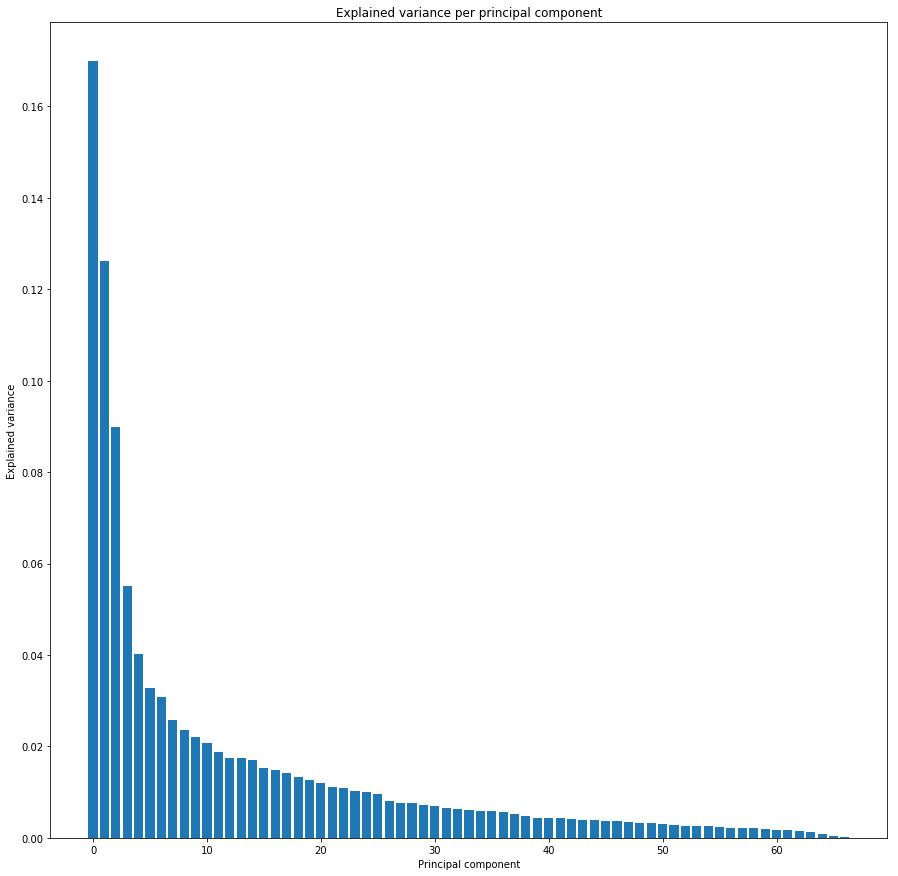

In [52]:
# Investigate the variance accounted for by each principal component.
num_components=np.arange(len(pca.explained_variance_ratio_))
values=pca.explained_variance_ratio_
plt.figure(figsize=(15, 15))
plt.bar(num_components,values)
plt.xlabel("Principal component")
plt.ylabel("Explained variance")
plt.title("Explained variance per principal component")
plt.show()

In [53]:
# Re-apply PCA to the data while selecting for number of components to retain.
def do_pca(n_components, data):
    '''
    Transforms data using PCA to create n_components, and provides back the results of the
    transformation.
    
    INPUT: n_components - int - the number of principal components to create
           data - the data you would like to transform
           
    OUTPUT: pca - the pca object created after fitting the data
            X_pca - the transformed X matrix with new number of components
    '''
    X = StandardScaler().fit_transform(data)
    pca = PCA(n_components)
    X_pca = pca.fit_transform(X)
    return pca, X_pca

pca_20 , azdias_pca_20 = do_pca(20, azdias_scaled)

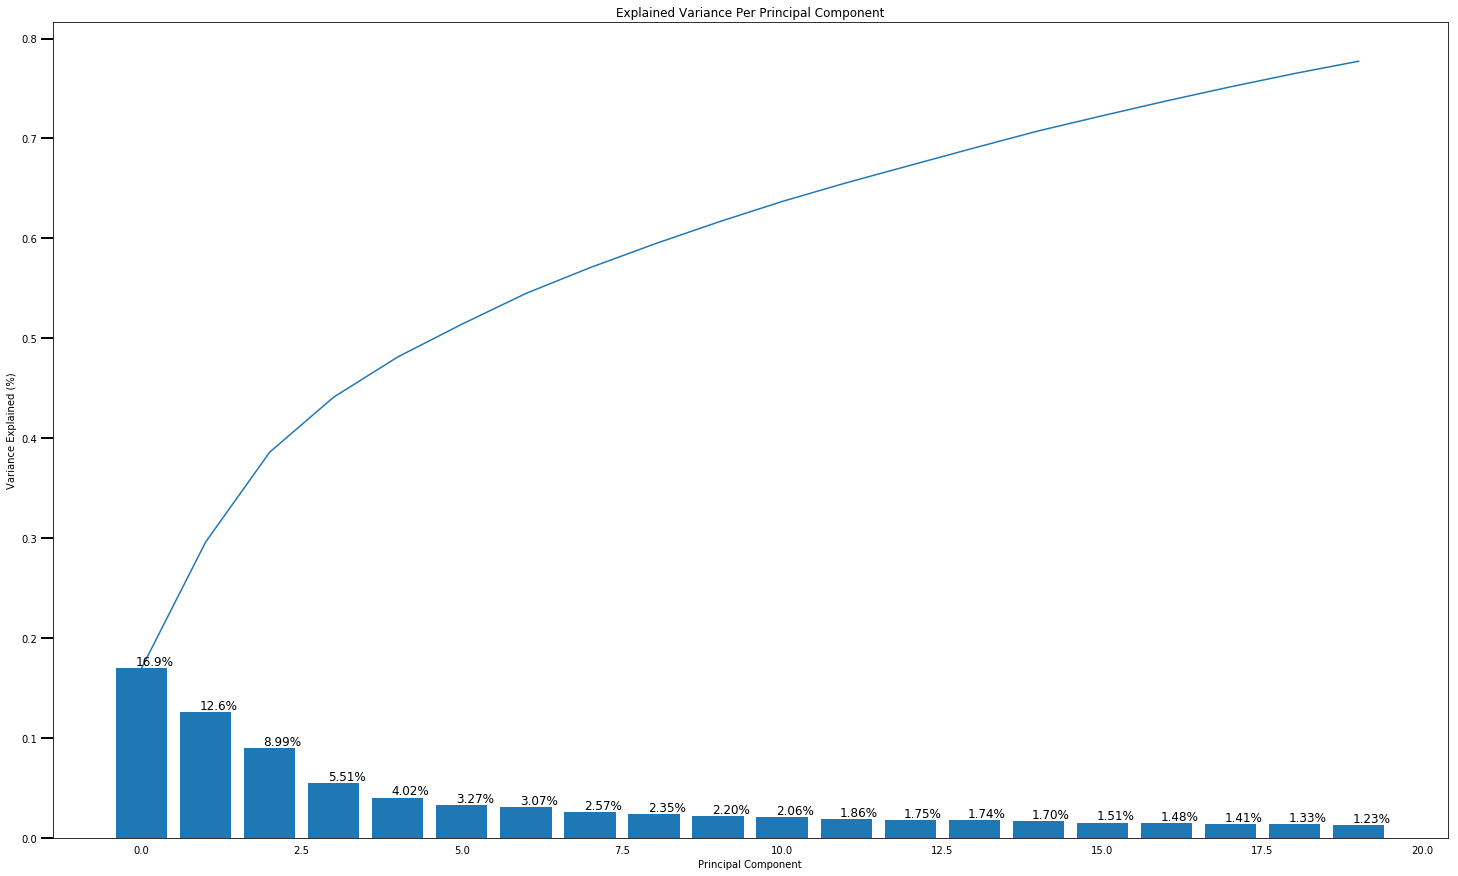

In [54]:
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(25, 15))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    

scree_plot(pca_20)

### Discussion 2.2: Perform Dimensionality Reduction

**We firstly used the already built in PCA function in sklearn.decomposition and we got a total of 16% explained vairaince which isn't that significant and satisfactory. Then, we defined our own function to do the PCA and used 20 components in the process and finally got a total of 80% explaine variance which is much better than the first trial.**

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [55]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.

def PCA_component_weights(df,pca,n):
    weights_df=(pd.DataFrame(pca.components_,columns=list(df.columns)).iloc[n])*100
    weights_df.sort_values(ascending=False, inplace=True)
    
    return weights_df

first_component_weights = PCA_component_weights(azdias_scaled,pca_20,0)
print(first_component_weights)
print(first_component_weights.sum())

PLZ8_ANTG3               22.684212
PLZ8_BAUMAX              21.775010
PLZ8_ANTG4               20.716054
Wealth                   20.453186
ORTSGR_KLS9              20.132942
EWDICHTE                 19.939453
HH_EINKOMMEN_SCORE       19.894594
FINANZ_HAUSBAUER         16.592439
PLZ8_ANTG2               15.661970
ARBEIT                   14.485373
RELAT_AB                 13.685711
ANZ_HAUSHALTE_AKTIV      13.453367
FINANZ_SPARER            11.506609
KBA05_ANTG3              11.340427
KBA05_ANTG4              10.308791
Movements                 9.725251
SEMIO_PFLICHT             8.660524
SEMIO_REL                 8.364752
REGIOTYP                  7.862220
SEMIO_RAT                 7.120278
SEMIO_MAT                 6.171782
SEMIO_TRADV               6.022592
SEMIO_FAM                 5.954449
OST_WEST_KZ               5.383277
W_KEIT_KIND_HH            5.363942
FINANZ_UNAUFFAELLIGER     5.005644
SEMIO_KULT                4.894496
SEMIO_KAEM                4.513730
FINANZ_ANLEGER      

In [56]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.

second_component_weights = PCA_component_weights(azdias_scaled,pca_20,1)
print(second_component_weights)
print(second_component_weights.sum())

ALTERSKATEGORIE_GROB     27.597051
SEMIO_ERL                24.726030
FINANZ_VORSORGER         24.263709
SEMIO_LUST               19.405698
RETOURTYP_BK_S           16.421436
SEMIO_KRIT               12.438956
SEMIO_KAEM               11.691166
W_KEIT_KIND_HH           11.192346
FINANZ_HAUSBAUER          9.617816
FINANZ_MINIMALIST         8.952776
SEMIO_DOM                 7.649896
WOHNDAUER_2008            6.551688
EWDICHTE                  6.344640
ORTSGR_KLS9               6.212572
PLZ8_ANTG3                5.807201
PLZ8_BAUMAX               5.162861
PLZ8_ANTG4                4.996225
ARBEIT                    4.602773
RELAT_AB                  4.494500
Wealth                    4.427002
PLZ8_ANTG2                4.218040
ANZ_HAUSHALTE_AKTIV       4.215080
HH_EINKOMMEN_SCORE        2.815955
ANZ_HH_TITEL              2.668483
Movements                 2.326615
REGIOTYP                  1.980417
KBA05_ANTG4               1.977585
Life_stage                1.930004
OST_WEST_KZ         

In [57]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.

third_component_weights = PCA_component_weights(azdias_scaled,pca_20,2)
print(third_component_weights)
print(third_component_weights.sum())

ANREDE_KZ                36.573273
SEMIO_VERT               34.512450
SEMIO_SOZ                25.732956
SEMIO_FAM                23.940826
SEMIO_KULT               22.299617
FINANZ_MINIMALIST        16.676719
RETOURTYP_BK_S           11.548538
FINANZ_VORSORGER         11.254260
ALTERSKATEGORIE_GROB      9.469854
W_KEIT_KIND_HH            9.275890
SEMIO_LUST                7.511294
SEMIO_REL                 5.432086
GREEN_AVANTGARDE          5.268040
ORTSGR_KLS9               4.773413
PLZ8_BAUMAX               4.727536
EWDICHTE                  4.673516
SEMIO_MAT                 4.528970
PLZ8_ANTG3                4.382627
PLZ8_ANTG4                4.167189
WOHNDAUER_2008            3.726173
ARBEIT                    3.471243
RELAT_AB                  3.174175
PLZ8_ANTG2                2.961335
Wealth                    2.343189
ANZ_HAUSHALTE_AKTIV       2.265190
ANZ_HH_TITEL              1.667037
OST_WEST_KZ               1.514030
KBA05_ANTG4               1.093366
ANZ_TITEL           

In [58]:
fourth_component_weights = PCA_component_weights(azdias_scaled,pca_20,3)
print(fourth_component_weights)
print(fourth_component_weights.sum())

GREEN_AVANTGARDE         33.358616
ORTSGR_KLS9              24.893641
EWDICHTE                 24.774620
LP_LEBENSPHASE_FEIN      24.010449
LP_LEBENSPHASE_GROB      23.211610
ANZ_PERSONEN             20.765311
ONLINE_AFFINITAET        18.680564
SEMIO_DOM                11.655759
RELAT_AB                 11.150201
PLZ8_ANTG3               10.905249
Decades                  10.882432
PLZ8_ANTG2                9.522881
PLZ8_ANTG4                9.219736
SEMIO_KAEM                8.790156
ARBEIT                    8.754115
PLZ8_BAUMAX               8.432328
PLZ8_HHZ                  8.015284
KBA05_ANTG1               7.996932
FINANZ_MINIMALIST         7.966094
MOBI_REGIO                5.271075
SEMIO_TRADV               4.911078
Life_stage                4.526568
FINANZ_UNAUFFAELLIGER     4.407463
SEMIO_RAT                 4.195102
ANZ_TITEL                 3.802968
KBA05_GBZ                 3.801352
WOHNDAUER_2008            3.701517
ANZ_HH_TITEL              1.060754
SOHO_KZ             

In [59]:
fifth_component_weights = PCA_component_weights(azdias_scaled,pca_20,4)
print(fifth_component_weights)
print(fifth_component_weights.sum())

LP_LEBENSPHASE_GROB      32.658522
LP_LEBENSPHASE_FEIN      31.527867
ANZ_PERSONEN             30.357055
KKK                      24.148181
OST_WEST_KZ              20.886423
REGIOTYP                 16.535503
ONLINE_AFFINITAET        13.632892
WOHNLAGE                 12.968915
ARBEIT                   11.254202
KONSUMNAEHE              10.974966
PLZ8_BAUMAX              10.449219
FINANZ_ANLEGER            9.729574
Wealth                    8.966534
WOHNDAUER_2008            8.816401
MIN_GEBAEUDEJAHR          8.745847
KBA05_ANTG4               8.485414
Movements                 8.252564
PLZ8_ANTG4                7.190985
BALLRAUM                  6.571811
HH_EINKOMMEN_SCORE        5.796861
RELAT_AB                  5.162734
SEMIO_ERL                 4.804142
GEBAEUDETYP_RASTER        4.434251
KBA05_ANTG3               3.784169
ALTERSKATEGORIE_GROB      3.511528
FINANZ_MINIMALIST         3.370862
Decades                   2.784780
INNENSTADT                2.747497
ANZ_HAUSHALTE_AKTIV 

### Discussion 2.3: Interpret Principal Components

**As we can see, the weights of all features are explained in each component and it is very obvious how our pca can identify components better than other like the fifth component here for example has total accuracy of around 91% while it give much weaker accuracy 10% in the third component for example. This is very normal with PCA because in the end we only take a subset of the features to explain our dataset.**

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [60]:
from sklearn.cluster import KMeans

def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding SSE for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the SSE score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)

    # Then fit the model to your data using the fit method
    model = kmeans.fit(data)
    
    # Obtain a score related to the model fit
    score = np.abs(model.score(data)) #absolute value taken
    
    return score

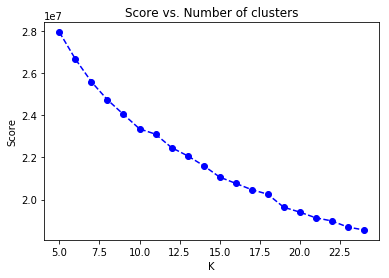

In [72]:
scores = []
centers = list(range(5,25))

for center in centers:
    scores.append(get_kmeans_score(azdias_pca_20, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Score');
plt.title('Score vs. Number of clusters');


In [73]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
kmeans_19= KMeans(n_clusters=19)
model_19 = kmeans_19.fit_predict(azdias_pca_20)

### Discussion 3.1: Apply Clustering to General Population

**We applied KMeans here using the get_kmeans_score function we then iterated over a range of centers and calculated its scores and used this data to plot the " score vs. number of clusters line graph. This shows that the most optimum number of components in our case here is 19. We used this value to re-fit and predict our kmeans model for the general demographic data.**

**I have just one question here, the cell that iterates over centers and plots the scores versus number of centers takes too much time( around 30 min ), does that normally happen? Is there any work around to avoid that ?**

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [63]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.
customer_data.isnull().sum().sum()
customer_data.fillna(keep_list.mean().iloc[0], inplace = True)

In [64]:
customer_data.isnull().sum().sum()

0

In [65]:
scaler = StandardScaler()
scaled_data_customers = scaler.fit_transform(customer_data)
print(scaled_data_customers)
customers_scaled=pd.DataFrame(scaled_data_customers,columns=customer_data.columns.tolist())

[[ 0.65936544 -1.          0.72134494 ..., -0.95470566 -1.         -1.        ]
 [ 0.65936544 -1.          0.72134494 ..., -0.95470566 -1.         -1.        ]
 [ 0.65936544 -1.          0.72134494 ...,  0.89294072 -1.         -1.        ]
 ..., 
 [ 0.65936544 -1.          0.72134494 ..., -0.95470566 -1.         -1.        ]
 [-0.65276023 -1.         -2.22547085 ...,  0.89294072 -1.         -1.        ]
 [-1.9648859  -1.          0.72134494 ...,  0.89294072 -1.         -1.        ]]


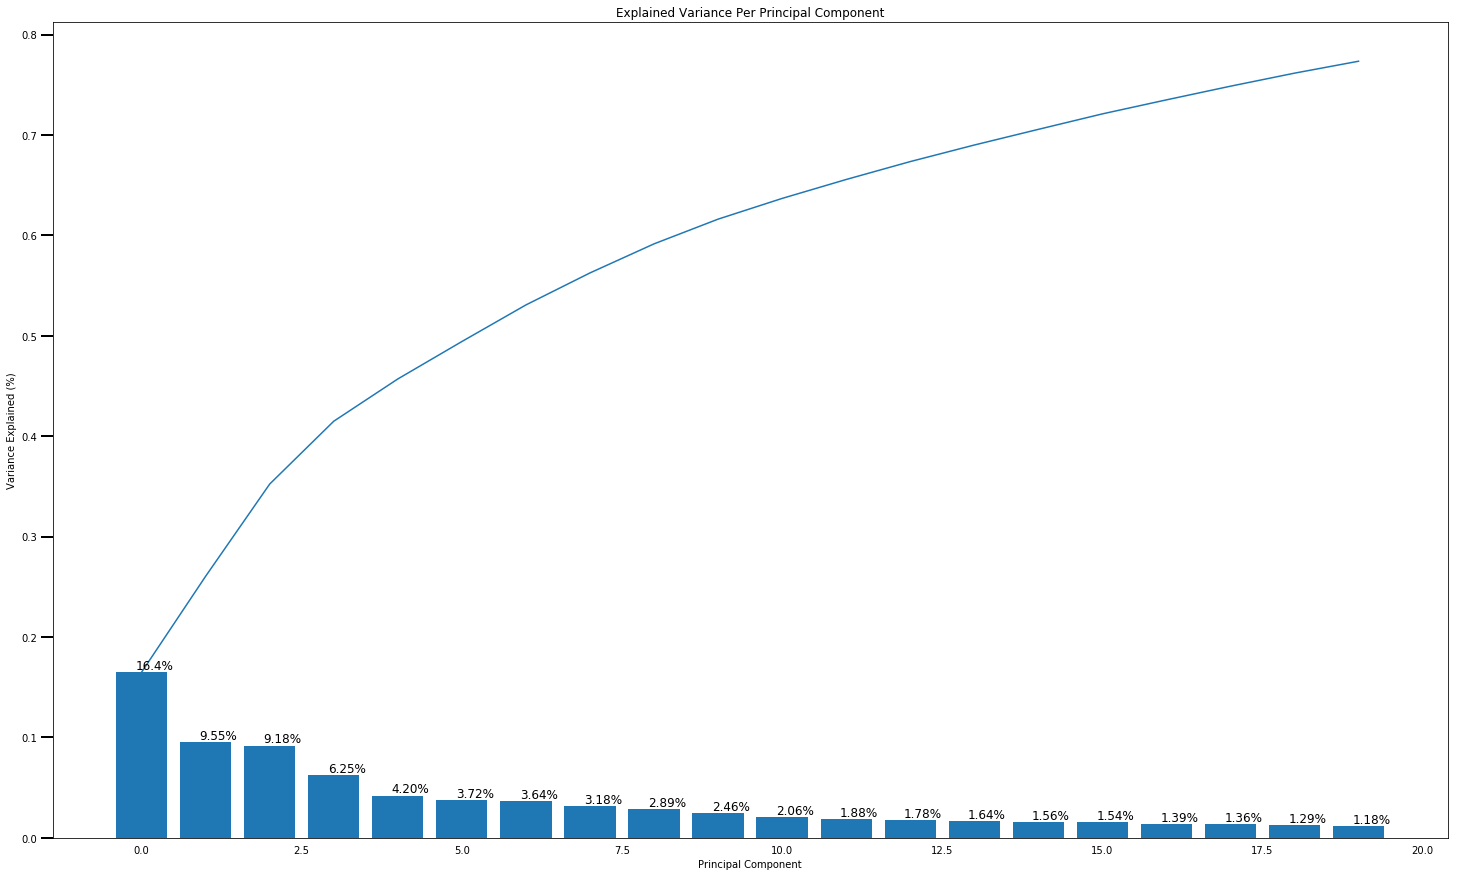

In [66]:
pca_20_c , customers_pca_20 = do_pca(20, customers_scaled)
scree_plot(pca_20_c)

In [75]:
kmeans_19_c = KMeans(n_clusters=19)
model_19_c = kmeans_19_c.fit_predict(customers_pca_20)

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

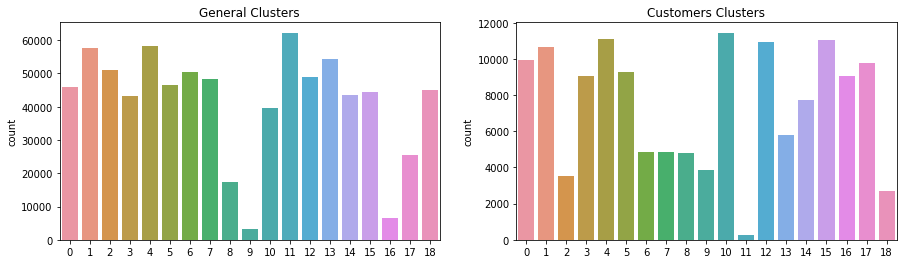

In [76]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.
def compare_bar_chart(general,customers):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figwidth(15)
    ax1.set_title('General Clusters')
    sns.countplot(general,ax=ax1)

    ax2.set_title('Customers Clusters')
    sns.countplot(customers,ax=ax2)
    plt.show()
    
compare_bar_chart(model_19,model_19_c)

In [77]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?
# Cluster 9 
cluster_9_component_weights = PCA_component_weights(azdias_scaled,pca_20,8)
print(first_component_weights)
print(first_component_weights.sum())

PLZ8_ANTG3               2.185124e+01
FINANZ_HAUSBAUER         2.176059e+01
PLZ8_BAUMAX              2.140796e+01
PLZ8_ANTG4               2.096610e+01
HH_EINKOMMEN_SCORE       1.951773e+01
EWDICHTE                 1.896763e+01
ORTSGR_KLS9              1.891083e+01
KBA05_ANTG4              1.682058e+01
PLZ8_ANTG2               1.578737e+01
KBA05_ANTG3              1.572555e+01
RELAT_AB                 1.423641e+01
ARBEIT                   1.410815e+01
ANZ_HAUSHALTE_AKTIV      1.410250e+01
SEMIO_KAEM               1.295235e+01
SEMIO_KRIT               1.213266e+01
SEMIO_DOM                1.026877e+01
Movements                9.769561e+00
SEMIO_ERL                8.542447e+00
W_KEIT_KIND_HH           7.334619e+00
REGIOTYP                 6.777734e+00
ANZ_HH_TITEL             5.181808e+00
RETOURTYP_BK_S           4.572464e+00
KBA05_ANTG2              4.253513e+00
KKK                      3.285188e+00
FINANZ_SPARER            2.437264e+00
SEMIO_RAT                2.263116e+00
PLZ8_HHZ    

In [78]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?

cluster_11_component_weights = PCA_component_weights(azdias_scaled,pca_20,10)
print(first_component_weights)
print(first_component_weights.sum())

PLZ8_ANTG3               2.185124e+01
FINANZ_HAUSBAUER         2.176059e+01
PLZ8_BAUMAX              2.140796e+01
PLZ8_ANTG4               2.096610e+01
HH_EINKOMMEN_SCORE       1.951773e+01
EWDICHTE                 1.896763e+01
ORTSGR_KLS9              1.891083e+01
KBA05_ANTG4              1.682058e+01
PLZ8_ANTG2               1.578737e+01
KBA05_ANTG3              1.572555e+01
RELAT_AB                 1.423641e+01
ARBEIT                   1.410815e+01
ANZ_HAUSHALTE_AKTIV      1.410250e+01
SEMIO_KAEM               1.295235e+01
SEMIO_KRIT               1.213266e+01
SEMIO_DOM                1.026877e+01
Movements                9.769561e+00
SEMIO_ERL                8.542447e+00
W_KEIT_KIND_HH           7.334619e+00
REGIOTYP                 6.777734e+00
ANZ_HH_TITEL             5.181808e+00
RETOURTYP_BK_S           4.572464e+00
KBA05_ANTG2              4.253513e+00
KKK                      3.285188e+00
FINANZ_SPARER            2.437264e+00
SEMIO_RAT                2.263116e+00
PLZ8_HHZ    

### Discussion 3.3: Compare Customer Data to Demographics Data

**It can  be seen from the two bar charts that compare between the general demographic data and the customer data that most clusters are underrepresented in the customer dataset and that it because of the lower total of customers if compared to the general dataset of course. But this is of course very evident in cluster number 11 for example because in the customers data it constitutes around 500 customers while in the demographic data we have 60,000 person here which is the maximum of all clusters.** 

**On the contrary cluster number 9 is somehow overrepresented in the customers dataset because it constitutes around 4000 person while in the demographic data it appears like it constitutes maybe a little less than 3000. This gives great insights on the business decisions that this company has to make like try to make decisions that assure the retention of cluster 9 to be their forever customers and try to attract more customers from cluster 11 because they are the mosty cluster represented in the general population and thus can benefit the company very well.**

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.